In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Fetch stock data for a specific ticker (e.g., 'AAPL' for Apple)
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-12-31")

print(data.head())
print(data.describe())

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796028  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088295  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662720  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320992  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484352  75.797501  76.110001  74.290001  74.290001  132079200
Price     Adj Close        Close         High          Low         Open  \
Ticker         AAPL         AAPL         AAPL         AAPL         AAPL   
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean     138.711616   140.808131   142.321389   139.143536   140.675507   
std       33.540054    33.313857    33.430571    33.179199    33.310018   
min      

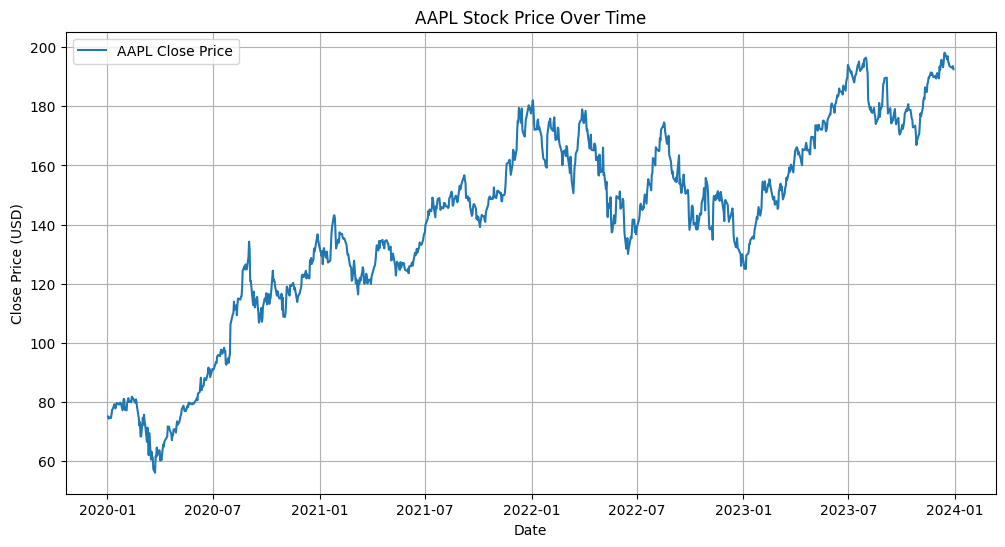

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f'{ticker} Close Price')
plt.title(f'{ticker} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [6]:
data['Daily Return'] = data['Close'].pct_change()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['Volatility'] = data['Daily Return'].rolling(window=30).std()


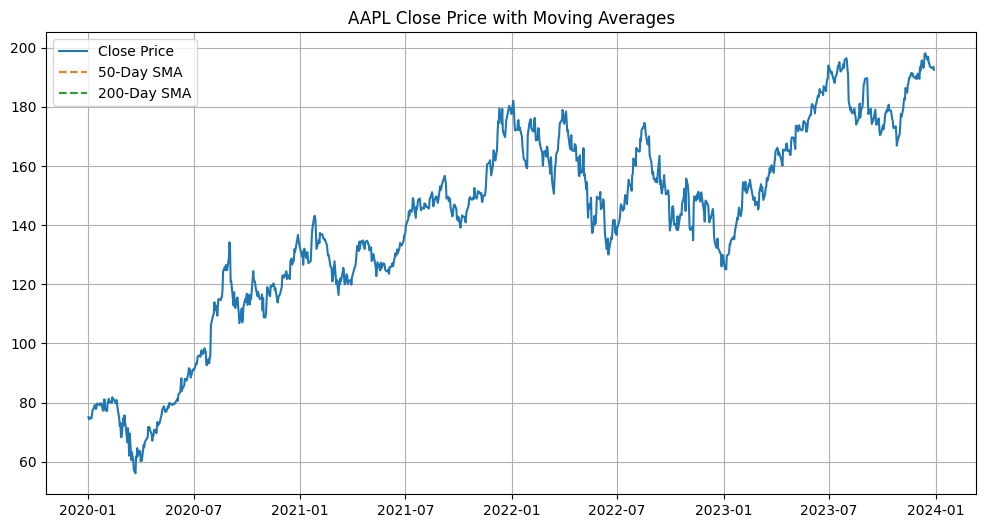

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-Day SMA', linestyle='--')
plt.plot(data['SMA_200'], label='200-Day SMA', linestyle='--')
plt.title(f'{ticker} Close Price with Moving Averages')
plt.legend()
plt.grid()
plt.show()


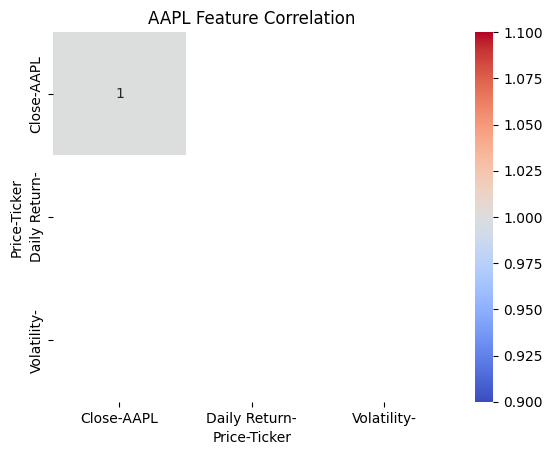

In [8]:
sns.heatmap(data[['Close', 'Daily Return', 'Volatility']].corr(), annot=True, cmap='coolwarm')
plt.title(f'{ticker} Feature Correlation')
plt.show()


In [9]:
# Example: Regress daily returns on lagged returns
data['Lagged Return'] = data['Daily Return'].shift(1)
data = data.dropna()  # Remove NaN values
X = sm.add_constant(data['Lagged Return'])
y = data['Daily Return']
model = sm.OLS(y, X).fit()

print(model.summary())


ValueError: zero-size array to reduction operation maximum which has no identity